## Decision Tree Classifier

The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.


### Terminology Related to Decision Tree

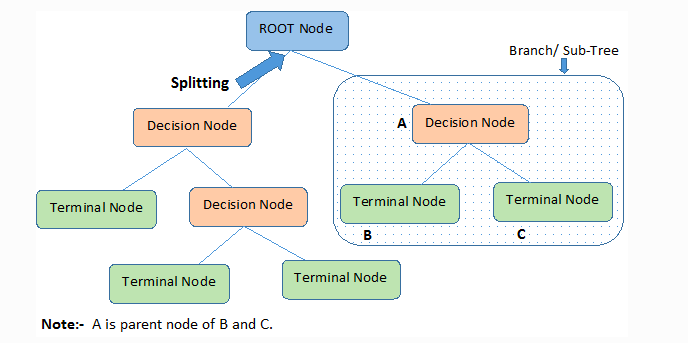

### How a Decision Tree Is Grown
The tree is built by splitting the records at each node according to a function of a single input field. The first task, therefore, is to decide which of the input fields makes the best split. The best split is defined as one that does the best job of separating the records into groups where a single class predominates in each group.

The measure used to evaluate a potential split is purity.

### Measures of Calculating the Purity
A number of different measures are available to evaluate potential splits. Algorithms developed in the machine learning community focus on the increase in purity resulting from a split, while those developed in the statistics community focus on the statistical significance of the difference between the distributions of the child nodes. Alternate splitting criteria often lead to trees that look quite different from one another, but have similar performance. That is because there are usually many candidate splits with very similar performance. Different purity measures lead to different candidates being selected, but since all of the measures are trying to capture the same idea, the resulting models tend to behave similarly
Purity measures for evaluating splits for categorical target variables include:

•	Gini (also called population diversity)

•	Entropy (also called information gain)

•	Information gain ratio

•	Chi-square test


In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from matplotlib import pyplot as plt

names = ['Sepal Length', 'Sepal Width','Petal length','Petal Width','Species']
data = pd.read_csv('Iris.csv', names=names)
df = pd.DataFrame(data)
X = df.drop(['Species'], axis=1)
Y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)

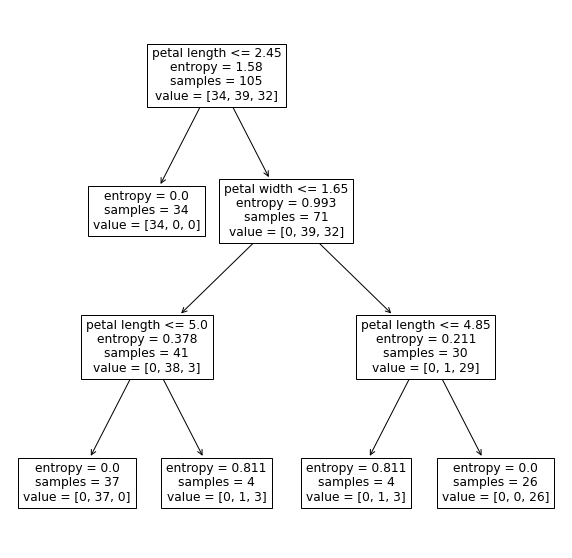

In [4]:

#build decision tree
clf_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=4,min_samples_leaf=4)
#max_depth represents max level allowed in each tree, min_samples_leaf minumum samples storable in leaf node
clf_entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4,min_samples_leaf=4)
#fit the tree to iris dataset
clf_gini.fit(X_train,y_train)
clf_entropy.fit(X_train,y_train)

#plot decision tree
fig, ax = plt.subplots(figsize=(10, 10)) #figsize value changes the size of plot
tree.plot_tree(clf_entropy,ax=ax,feature_names=['sepal length','sepal width','petal length','petal width'])
plt.show()

In [5]:
# Function to make predictions
def prediction(X_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values on:")
    print(y_pred)
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))


In [6]:
y_pred_gini = prediction(X_test,clf_gini)
#y_pred_entropy = prediction(X_test,clf_entropy)
df_pred=pd.DataFrame()
df_pred['y_test']=y_test
df_pred['y_pred']=y_pred_gini
df_pred.head(n=10)

Predicted values on:
['Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa']


,y_test,y_pred
129,Iris-virginica,Iris-virginica
12,Iris-setosa,Iris-setosa
119,Iris-virginica,Iris-virginica
16,Iris-setosa,Iris-setosa
124,Iris-virginica,Iris-virginica
136,Iris-virginica,Iris-virginica
33,Iris-setosa,Iris-setosa
2,Iris-setosa,Iris-setosa
117,Iris-virginica,Iris-virginica
46,Iris-setosa,Iris-setosa


In [7]:
cal_accuracy(y_test,y_pred_gini)

Confusion Matrix:  [[16  0  0]
 [ 0 10  1]
 [ 0  1 17]]
Accuracy :  95.55555555555556
Report :                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.94      0.94      0.94        18

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



## Example 2

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = pd.read_csv('PlayTennis.csv')
df = pd.DataFrame(data)
df['Outlook']= le.fit_transform(df['Outlook'])
df['Temperature']= le.fit_transform(df['Temperature'])
df['Humidity']= le.fit_transform(df['Humidity'])
df['Wind']= le.fit_transform(df['Wind'])
df['Play Tennis']= le.fit_transform(df['Play Tennis'])
X = df.drop(['Play Tennis'],axis=1)
y = df['Play Tennis']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)
df.head()
df.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play Tennis'], dtype='object')

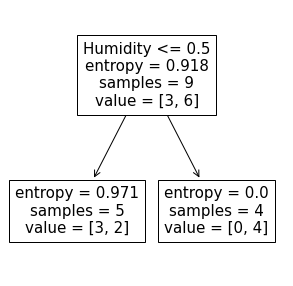

In [10]:
#build decision tree
clf_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=4,min_samples_leaf=4)
#max_depth represents max level allowed in each tree, min_samples_leaf minumum samples storable in leaf node
clf_entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4,min_samples_leaf=4)
#fit the tree to iris dataset
clf_gini.fit(X_train,y_train)
clf_entropy.fit(X_train,y_train)

#plot decision tree
fig, ax = plt.subplots(figsize=(5, 5)) #figsize value changes the size of plot
tree.plot_tree(clf_entropy,ax=ax,feature_names=['Outlook', 'Temperature', 'Humidity', 'Wind', 'Play Tennis'])
plt.show()